![knlogo](https://wp.kntu.ac.ir/aliakbarian/ode/images/logo.png)

<h1 style="color:Gray"> Least square optimization and hypothesis testing</h1>
<h2 style="color:Gray font'Serif'">Prerequisites(1): Introduction to Statistics </h2>
<h2 style="color:Gray"> Dr. Masoud Mashhadi </h2>
<h3 style="color:Gray"> Amirhesam Taherzadegani </h3>
<h4 style="color:Gray"> Geomatics engineering and geodesy faculty , KNTU </h4>

In [204]:
import matplotlib.pyplot as plt # importing the modules 
import numpy as np 
# if failed use this : !pip install matplotlib

In [205]:
font_style = {
  'fontname':'Times New Roman',
   'color':'white'
}

![pic](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

![pic2](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

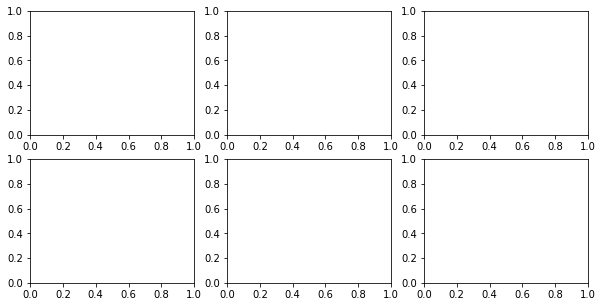

In [206]:
# simple figure 
fig, ax = plt.subplots(2, 3, figsize=(10, 5)) 
plt.show()

In [207]:
# how to fill the figures 
fig, ax = plt.subplots(2, 3, figsize=(10, 5)) 
plt.close()
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

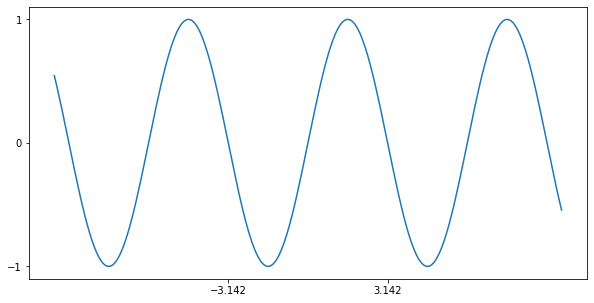

In [208]:
# how to print a function 
x = np.linspace(-10, 10, 200)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(x, y)
ax.set_xticks([-np.pi, np.pi])
ax.set_yticks([-1, 0, 1])
plt.show()

## Gaussian dist.

# $f(x)= {\frac{1}{\sigma\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-\mu}{\sigma})^2}$

In [214]:
# effect of variance in gaussian dist
x = np.linspace(-10, 10, 10000)
fx = lambda sig : np.exp(-0.5*(x/sig)**2)/(sig * np.sqrt(2 * np.pi)) 

In [215]:
random_variances = sorted(np.random.uniform(0.001, 6, (18, 1)))

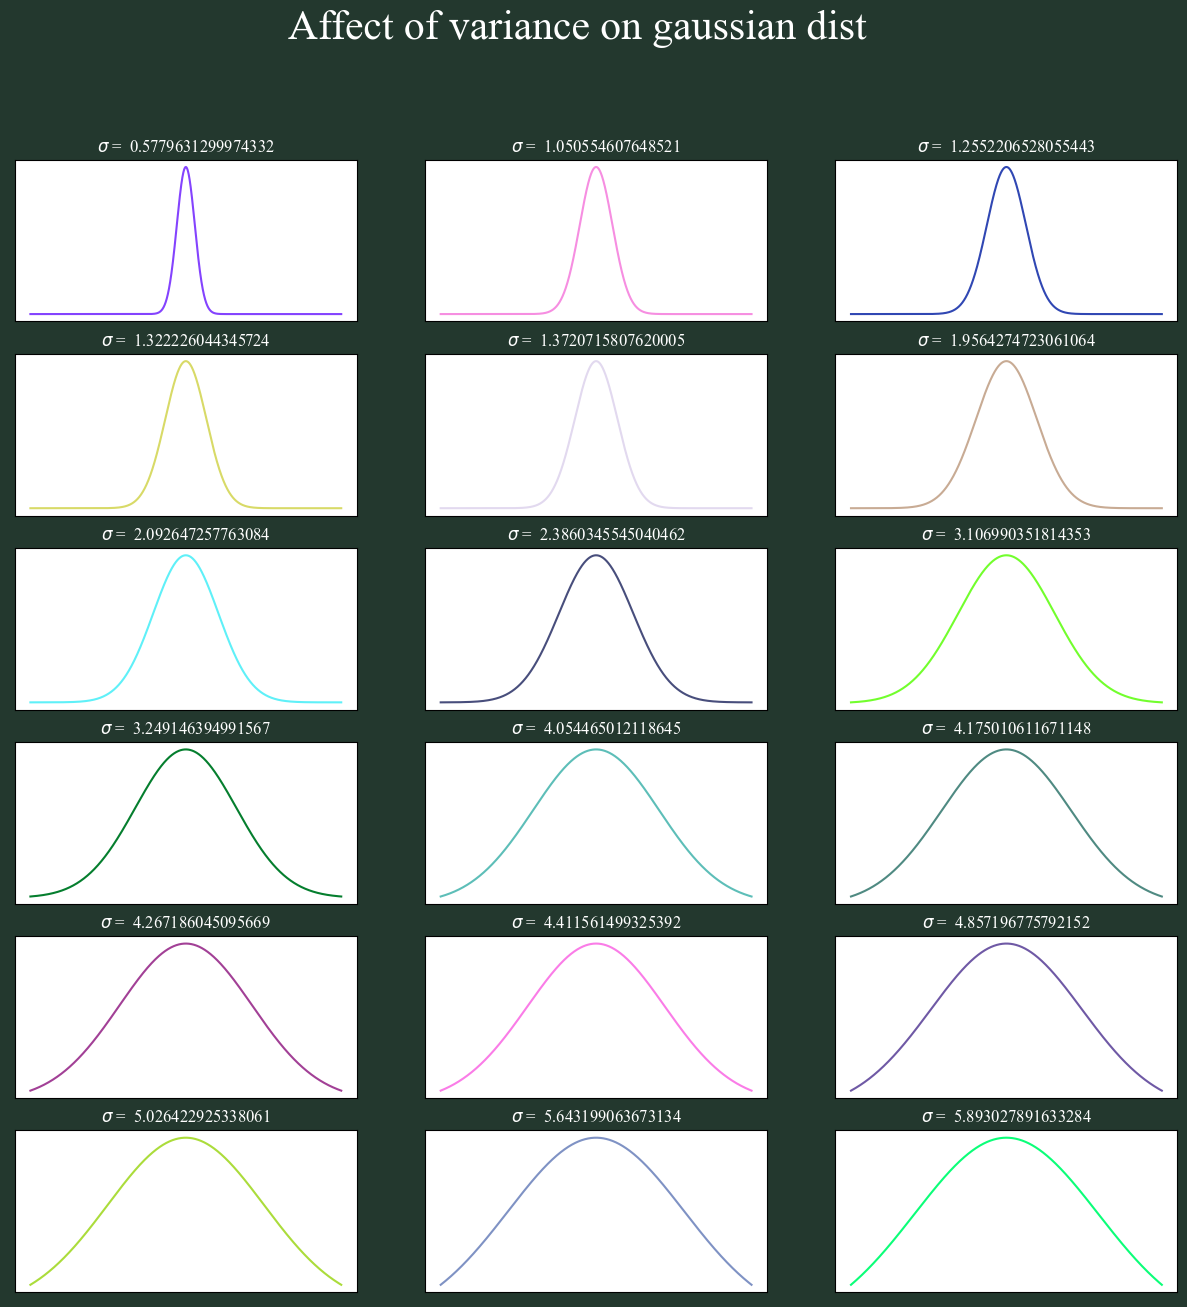

In [216]:
fig, ax = plt.subplots(6, 3, figsize=(15, 15), facecolor="#23382e", dpi=100)
k = 0
for i in range(6):
    for j in range(3):
        color = np.random.random(3)
        ax[i,j].plot(fx(random_variances[k]), color = color)
        ax[i,j].set_title(r"$\sigma$ = " + f" {random_variances[k][0]}", **font_style)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        k += 1
fig.suptitle("Affect of variance on gaussian dist", size =30, **font_style)
# fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0)
plt.show()

# Box Plot - Histogram - scatter plot

In [209]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Samina\Desktop\covid19-jhon hopkins.csv')
# reading csv files

In [210]:
new_data = data[['country_or_region','daily_new_cases' ]]

In [211]:
new_data

,country_or_region,daily_new_cases
0,Taiwan*,1
1,Thailand,2
2,US,1
3,China,10
4,China,1
...,...,...
16654,Netherlands,2
16655,Netherlands,0
16656,Nepal,1
16657,Morocco,190


In [212]:
random_count = np.random.randint(0,185,(15,))

array([<AxesSubplot:title={'center':'daily_new_cases'}, xlabel='country_or_region'>],
      dtype=object)

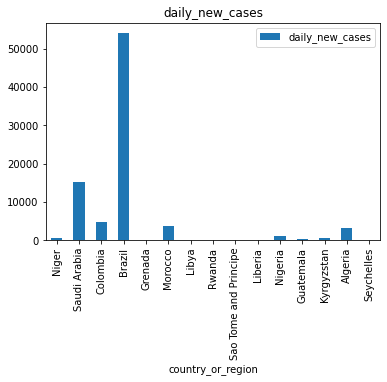

In [213]:
pd.DataFrame(new_data['daily_new_cases'].groupby(new_data['country_or_region']).sum()).iloc[random_count].plot(kind='bar',
                                                                                                               subplots=True)

In [217]:
linalgpoints = pd.read_excel(r"C:\Users\Samina\Desktop\a.xlsx")

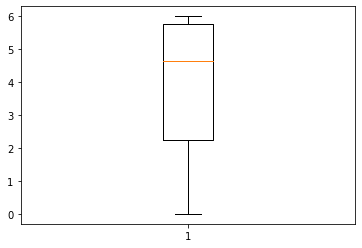

In [218]:
plt.boxplot(linalgpoints['نمره نهایی'].to_numpy())
plt.show()

In [219]:
# boxplot is sensitive to outliers
contain_out = np.array([-15, 1,2,3,4,5,6,7,8,9,10,15])

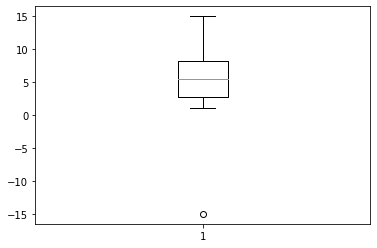

In [220]:
plt.boxplot(contain_out)
plt.show()

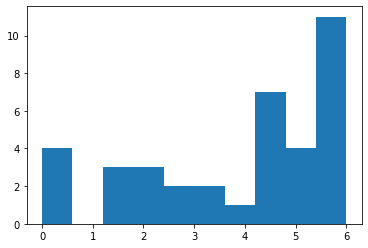

In [221]:
plt.hist(linalgpoints['نمره نهایی'].to_numpy())
plt.show()

In [222]:
linalgpoints.columns

Index(['ردیف', 'نام و نام خانوادگی', 'دفعات مشارکت در کلاس', 'اعمال امتیازی',
       'دفعات مشارکت در ارائه ها', 'جمع مشارکت', 'نمره کلاسی نهایی',
       'تمرین دو', 'تمرین سه', 'تمرین چهارم', 'میانگین سه تمرین', 'نمره نهایی',
       'اطلاعات آماری فعالیت کلاسی', 'Unnamed: 13'],
      dtype='object')

<AxesSubplot:xlabel='نمره نهایی', ylabel='نمره کلاسی نهایی'>

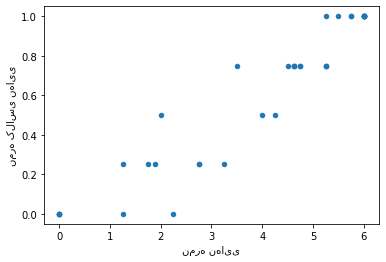

In [223]:
linalgpoints[['نمره کلاسی نهایی', 'نمره نهایی']].plot(kind='scatter',x='نمره نهایی', y='نمره کلاسی نهایی')

## it can be seen that if there you had good class activities you had good last grade too

## Correlation is not Casuation

In [224]:
# pearson correlation

# $r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$

In [225]:
x, y = linalgpoints['نمره نهایی'], linalgpoints['نمره کلاسی نهایی']

In [226]:
meanx = np.mean(x)
meany = np.mean(y)

In [227]:
xmmean = x - meanx #using numpy broadcasting
ymmean = y - meany

In [228]:
numinator = np.sum(xmmean * ymmean)

In [229]:
denuminator = np.sqrt(np.sum(xmmean**2) * np.sum(ymmean**2))

In [230]:
numinator / denuminator # very high correlation : pearson correlation

0.9510028343570908

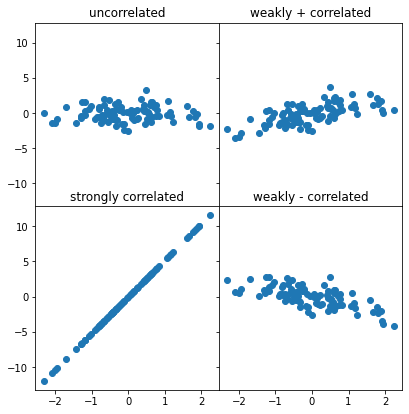

In [231]:
fig, ax = plt.subplots(2, 2, figsize=(6,6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

ax[0,0].scatter(x1,x2)
ax[0,0].set_title('uncorrelated')

ax[0,1].scatter(x1,x2+x1)
ax[0,1].set_title('weakly + correlated')

ax[1,1].scatter(x1,x2-x1)
ax[1,1].set_title('weakly - correlated')

ax[1,0].scatter(x1,5*x1+0.2*x1)
ax[1,0].set_title('strongly correlated')

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0, hspace=0)

# Normal curve

In [232]:
mu, sigma = 0, 0.5
s = np.random.normal(mu, sigma, 10000)

In [233]:
histogram, bin_edges = np.histogram(s)

densitybool, default: False

If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

If stacked is also True, the sum of the histograms is normalized to 1.

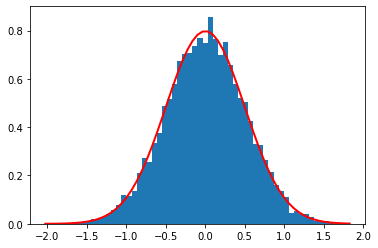

In [234]:
fig, ax = plt.subplots()
count, bins, ignored = plt.hist(s, 60, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

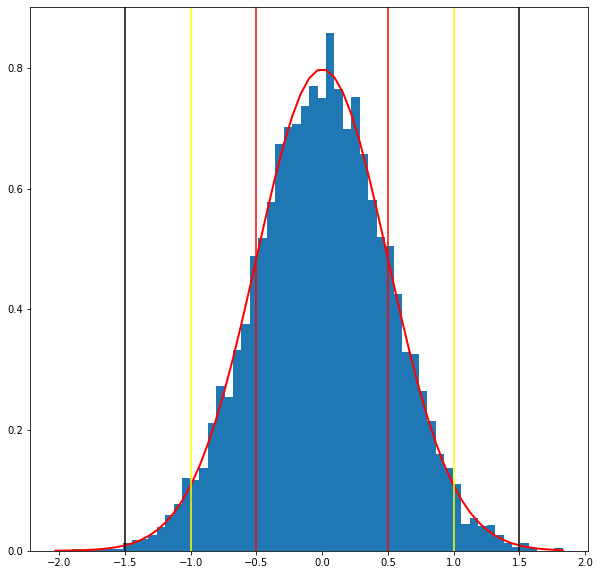

In [235]:
fig, ax = plt.subplots(figsize=(10,10))
count, bins, ignored = plt.hist(s, 60, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
ax.axvline(0.5, color = 'r')
ax.axvline(-0.5, color = 'r')
ax.axvline(2*0.5, color = 'yellow')
ax.axvline(-2 * 0.5, color = 'yellow')
ax.axvline(3*0.5, color = 'black')
ax.axvline(-3* 0.5, color = 'black')

plt.show()

# $\hat{x } \pm \sigma \to $ 0.65 of data
# $\hat{x } \pm 2\sigma \to $ 0.95 of data
# $\hat{x } \pm 3\sigma \to $ 0.99 of data

# Z-score $\to $ deviation coefficent from mean
# $Z =\frac{ X - \hat{x}}{s}$

In [236]:
s[20] - np.mean(s) / np.std(s)

-0.35504474879573605

# PDF, PMF, CDF, PPF

## The cumulative distribution function (CDF) is the probability that a random variable, say X, will take a value less than or equal to x.
## For example, if you roll a die, the probability of obtaining 1, 2, 3, 4, 5, or 6 is 16.667% (=1/6). The cumulative distribution function (CDF) of 1 is the probability that the next roll will take a value less than or equal to 1 and is equal to 16.667% as there is only one possible way to get a 1.

In [237]:
from scipy.stats import binom
from scipy.stats import norm

In [238]:
#binom.cdf(x, n, p)

In [239]:
binom.cdf(2, 2, 0.6)

1.0

In [240]:
norm.cdf(0.5, loc=0, scale=0.5)

0.8413447460685429

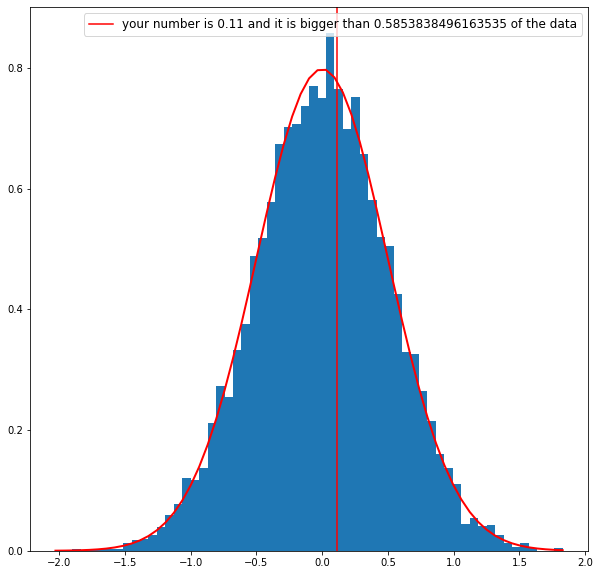

In [241]:
fig, ax = plt.subplots(figsize=(10,10))
count, bins, ignored = plt.hist(s, 60, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
number = 0.11
put_before = norm.cdf(number, loc=0, scale=0.51)
ax.axvline(number, color='r', label=f'your number is {number} and it is bigger than {put_before} of the data')
ax.legend(fontsize = 'large')
plt.show()

![zscore](https://www.dummies.com/wp-content/uploads/z-score-table-1.png)

In [242]:
norm.cdf(-0.7)

0.24196365222307303

## The probability density function (PDF) is the probability that a random variable, say X, will take a value exactly equal to x.

## For example, if you roll a die, the probability of obtaining 1, 2, 3, 4, 5, or 6 is 16.667% (=1/6). The probability density function (PDF) or the probability that you will get exactly 2 will be 16.667%.

## Equivalent of PDF in discrete disturbuation is called PMF

In [243]:
norm.pdf(18, loc=0, scale=1)

1.758749542595104e-71

![IMAGE](https://www.graduatetutor.com/wp-content/uploads/2021/03/Cumulative-Density-Function-of-a-dice-6.jpg)

## To find the median of a distribution, we can use the Percent Point Function (PPF), which is the inverse of the CDF.

In [244]:
norm.cdf(-3.62)

0.00014730150790747234

In [245]:
norm.ppf(0.999999, loc=0, scale=0.5)

2.3767121544085437

# Covariance matrix

## 	The covariance matrix ΣXX is a symmetric positive semi-definite matrix whose element in the 𝑗, 𝑘 position is the covariance between the 𝑗𝑡ℎ and 𝑘𝑡ℎ elements of a random vector. ie the j and k columns of X.

## the Diagonal elements show the variance since COV(X,X) = VAR(X)





In [246]:
from numpy.random import multivariate_normal

In [247]:
mean = np.array([6.5, 17.5])
cov = np.array([[1, 0],
                [0, 0.25]])

In [248]:
# getting random samples for each random normal disturbuation
multivariate_normal(mean, cov)

array([ 6.94818602, 17.14940377])

## What will happen if we measure the distances with different accuracies 

In [249]:
# lets assume we have a distance of 6 meter and we are going to have it measured with devices with 0.5 to 2 value as variance

In [250]:
mean = 6 * np.ones(25)
cov = np.diag(np.linspace(0, 0.75, 25))

In [251]:
import sympy as sp

In [252]:
#sp.Matrix(cov)

In [253]:
multivariate_normal(mean, cov)

array([6.        , 5.85260278, 5.75282757, 5.84685299, 5.81711666,
       5.818224  , 5.96337771, 6.08458541, 5.98737419, 6.04387025,
       4.88488444, 5.6464984 , 5.77842264, 5.38957311, 7.31866592,
       5.28201336, 4.8234859 , 6.52516742, 6.03608912, 5.44923386,
       7.14167094, 6.6853786 , 4.90869569, 4.8191529 , 5.72375669])

# Other useful disturbuations

# Chi-squared

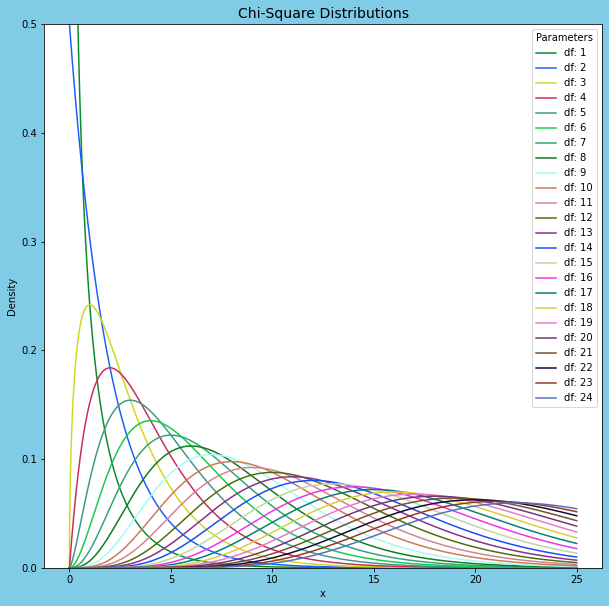

In [254]:
from scipy.stats import chi2

fig, ax = plt.subplots(figsize=(10,10), facecolor=(0.5,0.8,0.9))
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 25, 0.001)

#define multiple Chi-square distributions
for i in range(1, 25):
    colors = np.random.randint(0, 255, (3,))/255
    ax.plot(x, chi2.pdf(x, df=i), label=f'df: {i}', color=colors) 
    
#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)
ax.set_ylim(0,0.5)
plt.show()

In [255]:
chi2.rvs(size = (6,3), df=10)

array([[12.03641442, 13.7367652 ,  5.52936064],
       [15.16643927, 13.35845332,  8.70444614],
       [ 5.96868309, 13.77742489, 15.15759858],
       [ 8.46138028, 12.09444579, 12.91208654],
       [ 4.92638224, 15.06903465, 16.31525372],
       [ 5.44290526,  6.22222862, 10.30124448]])

# t-student

In [256]:
from scipy.stats import t

#generate random values from t distribution with df=6 and sample size=10
t.rvs(df=6, size=10)

array([ 1.60632303, -1.00802197, -0.13828428,  1.28863705,  0.38607332,
       -0.24299656,  0.60893211,  1.84209786,  0.21970242,  0.53656811])

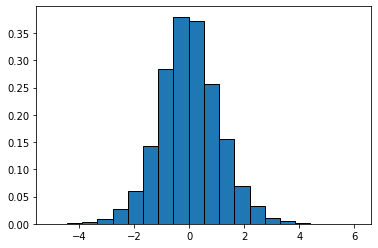

In [257]:
from scipy.stats import t
import matplotlib.pyplot as plt

#generate t distribution with sample size 10000
x = t.rvs(df=12, size=10000)

#create plot of t distribution
plt.hist(x, density=True, edgecolor='black', bins=20)
plt.show()

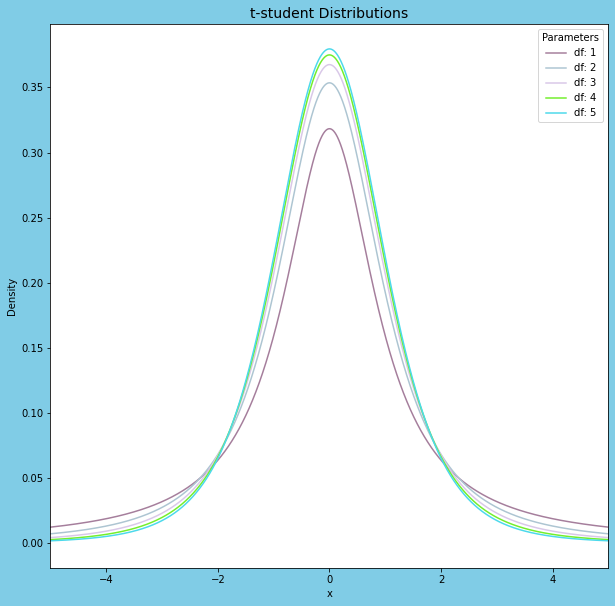

In [258]:
fig, ax = plt.subplots(figsize=(10,10), facecolor=(0.5,0.8,0.9))
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(-25, 25, 0.001)

#define multiple Chi-square distributions
for i in range(1, 6):
    colors = np.random.randint(0, 255, (3,))/255
    ax.plot(x, t.pdf(x, df=i), label=f'df: {i}', color=colors) 
    
#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('t-student Distributions', fontsize=14)
ax.set_xlim(-5,5)
plt.show()

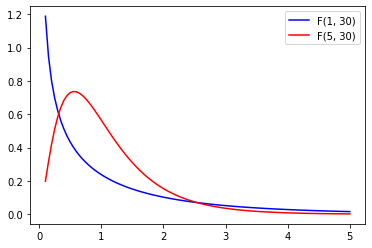

In [259]:
from scipy.stats import f
fvalues = np.linspace(.1, 5, 100)
# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# Confidence interval 

# $\mu \in  \hat{x} \space \pm Z\frac{s}{\sqrt{n}}$

In [260]:
import scipy.stats as st

#define sample data
np.random.seed(0)
data = np.random.randint(10, 30, 50)

#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(17.400060940568054, 21.079939059431943)

# $\mu \in  \hat{x} \space \pm t_{n-1}\frac{s}{\sqrt{n}}$

In [261]:
#define sample data
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(16.75776979778498, 24.042230202215016)

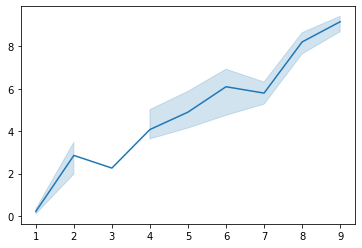

In [262]:
import seaborn as sns

#create some random data
x = np.random.randint(1, 10, 30)
y = x+np.random.normal(0, 1, 30)

#create lineplot
ax = sns.lineplot(x, y, ci=99.9999999999)

# Hypothesis Testing

## We test if a statement is statistically significant or not

# REMEMBER 
# H0: Nothing extraordinary is going on 
# Whatever the observation states

# HA: Alternative 
# Something is off

- ## Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

- ## Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

## One tailed test :- A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test.

# Two-tailed test :- A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.

![stat](https://www.fromthegenesis.com/wp-content/uploads/2018/06/Types-of-Hypothesis-Tests.jpg)

# Z-test 

# $Z_{score} = \frac{observered - expected}{SE}$
# $SE := \text{Standard Error} = \frac{\sigma}{\sqrt{n}}$

## Several different types of tests are used in statistics (i.e. f test, chi square test, t test). You would use a Z test if:
## Your sample size is greater than 30. Otherwise, use a t test.
## Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
## Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
## Your data should be randomly selected from a population, where each item has an equal chance of being selected.
## Sample sizes should be equal if at all possible.

## P-value if under the $1 - \alpha$ we can say that we in $\alpha$ percent confidence dont have enough evidence to accept the Null hypotheis 
## otherwise we will accept it

In [263]:
from statsmodels.stats.weightstats import ztest as ztest

# One surveyor claims, the weather has an unusual affect on one certain instrument
# one gives out a set of observation carried on some 100-m distances 
# H0 := nothing extraordinary is going on, the mean is 100
# HA := mean is not equal to 100

data = 100 * np.ones(100) + 6 * np.random.random(100)

#perform one sample z-test
ttest, pvalue = ztest(data, value=100)
pvalue # less than 0.5 so we reject the null hypothesis

7.057002863620336e-80

0.01760010010885238


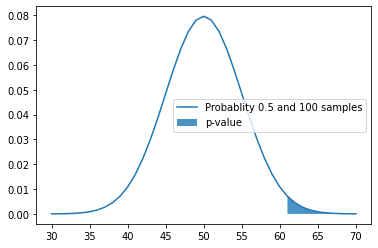

In [264]:
# we flip a coin we get 60 heads in 100 flips, is the coin fair?
# h0: Nothing extraordinary is going on (coin is fair p(head)=0.5)
# ha: something is off (coin is not fair p(head)!=0.5)
# we use bionomial dist 
# success: tail

success = np.arange(30, 71)
plt.plot(success, binom.pmf(success, 100, 0.5),
         label="Probablity 0.5 and 100 samples")
upper_success_tvalues = success[success> 60]
plt.fill_between(upper_success_tvalues, 0, binom.pmf(upper_success_tvalues, 100,
                                                                0.5), alpha=.8, label="p-value")
_ = plt.legend()
pval = 1 - binom.cdf(60, 100, 0.5)
print(pval)

## A t-test is used to compare the mean of two given samples. Like a z-test, a t-test also assumes a normal distribution of the sample. A t-test is used when the population parameters (mean and standard deviation) are not known.

## The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between group

In [265]:
# Two surveying groups have gotten a mean of error as below can we claim there is a significant difference between them
# they have used similar equipments meaning(same variance)

In [266]:
group1 = np.array([0.14, 0.15, 0.15, 0.16, 0.13, 0.08, 0.14, 0.17, 0.16, 0.14, 0.19,
       0.2 , 0.21, 0.15, 0.15, 0.16, 0.16, 0.13, 0.14, 0.12])

group2 = np.array([0.15, 0.17, 0.14, 0.17, 0.14, 0.08, 0.12, 0.19, 0.19, 0.14, 0.17,
       0.22, 0.24, 0.16, 0.13, 0.16, 0.13, 0.18, 0.15, 0.13])

In [267]:
print(np.var(group1), np.var(group2))

0.0007727499999999999 0.0012259999999999999


In [268]:
#perform two sample t-test with equal variances
import scipy.stats as stats
stats.ttest_ind(a=group1, b=group2, equal_var=True)

Ttest_indResult(statistic=-0.6337397070250214, pvalue=0.5300471010405271)

# ANOVA (Analysis of Variance), shapiro test(Is data following normal dist)-bartlett(Homogenity)

![anova](https://cdn1.byjus.com/wp-content/uploads/2020/09/one-way-ANOVA-formulas.png)

In [336]:
# we have three surveying robots, all have had some measurements , how can we compare their accuracies 

In [337]:
import pandas as pd
import numpy as np
#Create Artificial randomly distributed data representing students' exam results
E1 = np.random.normal(loc=74,scale=4,size=40)
E2 = np.random.normal(loc=88,scale=4,size=40)
E3 = np.random.normal(loc=84,scale=4,size=40)

In [338]:
e1n = ["Equip 1"]*40
e2n = ["Equip 2"]*40
e3n = ["Equip 3"]*40

In [384]:
groupnames = np.array([e1n,e2n,e3n]).flatten()
groupmeasures = np.array([E1,E2,E3]).flatten().astype('float64')

In [385]:
groups = pd.DataFrame([groupnames, groupmeasures]).T
groups.columns = ['group', 'measurements']
groups

,group,measurements
0,Equip 1,70.8299
1,Equip 1,73.5411
2,Equip 1,76.0199
3,Equip 1,77.463
4,Equip 1,69.1988
...,...,...
115,Equip 3,79.9899
116,Equip 3,83.9259
117,Equip 3,82.8454
118,Equip 3,85.2909


In [386]:
# lets assume Null hypothesis is that the data is normal so H0: X~N(mu, sigma)
# ALt hypothesis data is not normal
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f' W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}, test rejects normality'
    else:
        return f" W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. test shows normality."

![shapiro](https://spss-tutorials.com/img/shapiro-wilk-test-what-is-it.png)

In [387]:
from scipy.stats import bartlett
alpha = 0.05
stat, p_bartlet = bartlett(E1,E2,E3)

In [388]:
if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")

0.0726820637511708 : large p-value suggests that our data is homogeneous


In [389]:
# H0: no significant difference between the accuracies ( sigH1 == sigH2 == sigH3 )
# Ha : significant difference between the accuracies
#Setting up alpha value
alpha = 0.05
#F_Critical Value/Look up table or:
dfn = len([E1,E2,E3])-1
dfd = len(groups) - len([E1,E2,E3])
f_crit = f.ppf(1-alpha,dfn,dfd)
f_crit

3.073762904449709

In [390]:
#Calculate overal mean
overall_mean = sum(groups.measurements/len(groups))
overall_mean

82.03906103010159

In [392]:
groups.measurements = groups.measurements.astype('float64')

In [394]:
mean_each_g = groups.groupby(by = ['group']).mean() # work with group by

In [423]:
# sum of squared mean differences in groups
ssb = []
for g in [E1, E2, E3]:
    group_mean = g.mean()
    sqr_mean_diff = (group_mean-overall_mean)**2
    sum_sqr = len(g)*sqr_mean_diff
    ssb.append(sum_sqr)

In [ ]:
SSb = sum(ssb)
k = len(df_students.Country.unique())
MSb = SSb/(k-1)

In [426]:
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for g in [E1, E2, E3]:
    group_mean = g.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, g)))
    sum_sqr_diff.append(sum_sqr)

In [427]:
sum_sqr_diff

[740.570958093372, 399.14591678199594, 396.49405449229215]

In [434]:
SSw = sum(sum_sqr_diff)
#Calculate MSw (Unexplained Variance) 
N = len(groups)
k = 3
MSw = SSw/(N-k)
F_stat = MSb/MSw
#Find the P-value 
p_value = f.sf(F_stat, dfn, dfd) #find p-value of F test statistic
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Error Residual","Total"], 
                            "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                            "Degrees of Freedom":[k-1,N-k,N-1],
                            "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
anova_table["F"] =[F_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]
display(anova_table)
#Reject the null Hypothesis 
if (F_stat > f_crit) & (p_value<alpha):
    print(f"We reject H0 because f-statisitic {F_stat} > f-critical {f_crit} and p-value {p_value} < alpha {alpha}",
         "\nWe have significant evidence at 0.05 level the robots belong to different populations.")

,Sums of Squares,Degrees of Freedom,Mean Squares,F,P-Value
Variation Source,,,,,
Between Groups,4732.34,2,2366.17,180.211,1.8753623442091156e-36
Error Residual,1536.21,117,13.13,,
Total,6268.55,119,,,


We reject H0 because f-statisitic 180.2109595562834 > f-critical 3.073762904449709 and p-value 1.8753623442091156e-36 < alpha 0.05 
We have significant evidence at 0.05 level the robots belong to different populations.
